<a href="https://colab.research.google.com/github/gdg-ml-team/DevFest19/blob/master/Exploratory_Data_%26_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data &_Model Development



<h1> Contents </h1>




---

<h3> 

* Understand Data 
* Data Exploration
* What are the main characteristics which have the most impact
* Data Visualization 
* Strong and Weak Linear Relationship  
* Detect and Deal with Outliers
* Correlation
* Descriptive Statistical Analysis
* Conclusion (What are Important Variables)
* Model Development
* Save the Model

</h3>



---

 





#Understand Data
 <h2>Read Dataset Description</h2>
We want to predict students performance in math in secondary education of two high schools. Please read the description of data set before start.

 [Dataset Description](https://archive.ics.uci.edu/ml/datasets/student+performance)

<h3>Import data</h3>
<p>
here link of raw data set: <a href="https://github.com/gdg-ml-team/DevFest19/blob/master/student-math.csv">https://github.com/gdg-ml-team/DevFest19/blob/master/student-math.csv</a>. 

</p>



###Import libraries




In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Load the dataset

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
filename = "https://raw.githubusercontent.com/gdg-ml-team/DevFest19/master/student-math.csv"


###Read the dataset

In [0]:
df = pd.read_csv(filename)

##Data Exploration

In [0]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


<h3>Convert categorical values into numerical values</h3>

In [0]:
# We need to represents the categorical values as numerical values
columns  = df.columns
for coloumn in columns :
    if (str(df[coloumn].dtype).startswith("object")):
            values = df[coloumn].unique()
            convertor = dict(zip(values,range(len(values))))
            print(coloumn,convertor)
            df[coloumn] = [convertor[item] for item in df[coloumn]]

school {'GP': 0, 'MS': 1}
sex {'F': 0, 'M': 1}
address {'U': 0, 'R': 1}
famsize {'GT3': 0, 'LE3': 1}
Pstatus {'A': 0, 'T': 1}
Mjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
Fjob {'teacher': 0, 'other': 1, 'services': 2, 'health': 3, 'at_home': 4}
reason {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}
guardian {'mother': 0, 'father': 1, 'other': 2}
schoolsup {'yes': 0, 'no': 1}
famsup {'no': 0, 'yes': 1}
paid {'no': 0, 'yes': 1}
activities {'no': 0, 'yes': 1}
nursery {'yes': 0, 'no': 1}
higher {'yes': 0, 'no': 1}
internet {'no': 0, 'yes': 1}
romantic {'no': 0, 'yes': 1}


In [0]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,0,0,4,4,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,0,1,1,1,0,1,0,1,1,2,0,1,1,0,0,1,0,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,1,1,1,1,0,1,1,0,1,2,3,0,0,1,0,0,0,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,0,0,1,4,2,1,2,2,0,1,3,0,1,1,1,1,0,0,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,0,0,1,3,3,2,1,2,1,1,2,0,1,1,1,0,0,0,0,0,4,3,2,1,2,5,4,6,10,10


##What are the main characteristics which have the most impact ?
Use **Visualization** to answer

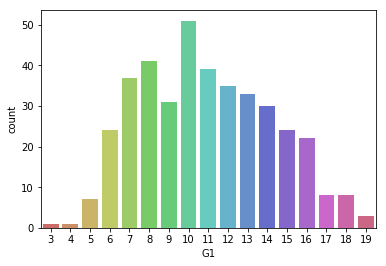

In [0]:
sb.countplot(x='G1',data=df, palette='hls')

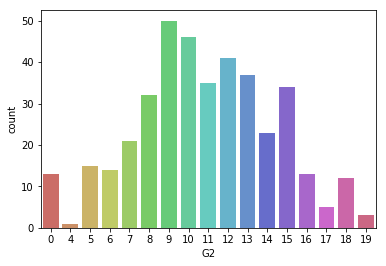

In [0]:
sb.countplot(x='G2',data=df, palette='hls')

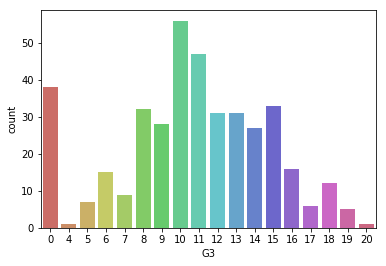

In [0]:
sb.countplot(x='G3',data=df, palette='hls')

## Overall View

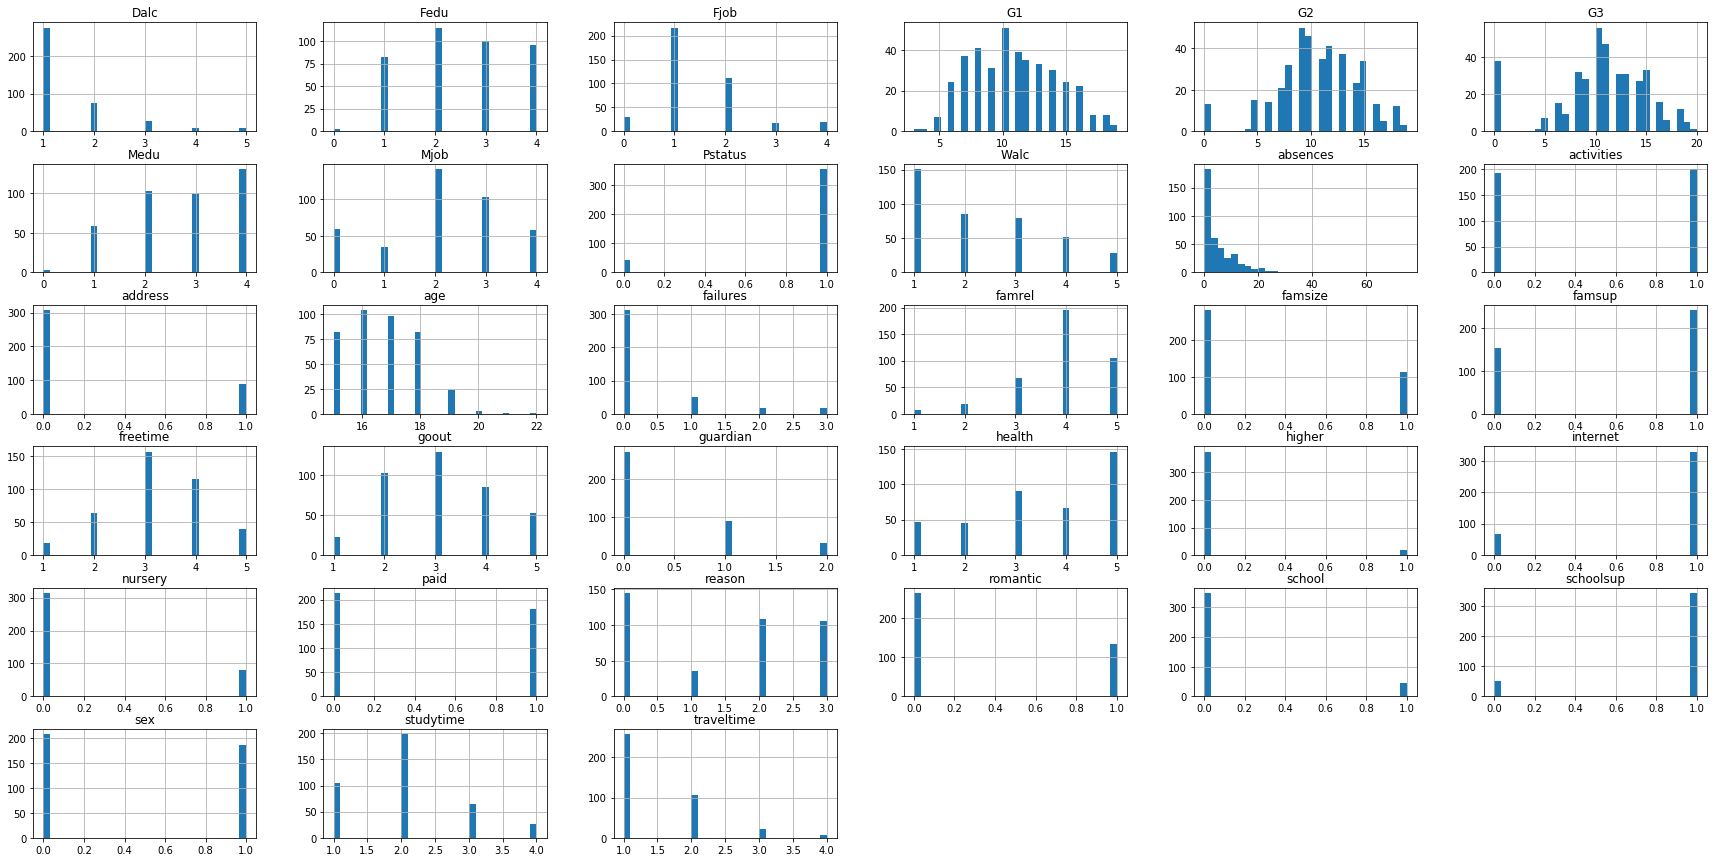

In [0]:
df.hist(bins=30,figsize=(30,15)) 
plt.show()

##Strong and Weak Linear Relationship
In order to start understanding the (linear) relationship between an individual variable and the G3. We can do this by using "**regplot**", which plots the scatterplot plus the fitted regression line for the data.

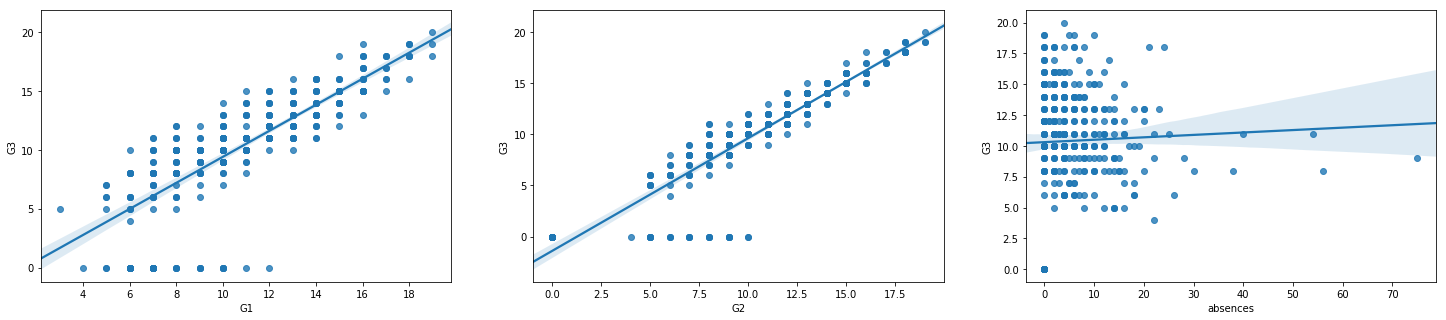

In [0]:
plt.figure(figsize=(25,5))
plt.subplot(131)
sb.regplot(x="G1", y="G3", data=df)
plt.subplot(132)
sb.regplot(x="G2", y="G3", data=df)
plt.subplot(133)
sb.regplot(x="absences", y="G3", data=df)



A good way to visualize categorical variables is by using **boxplots**

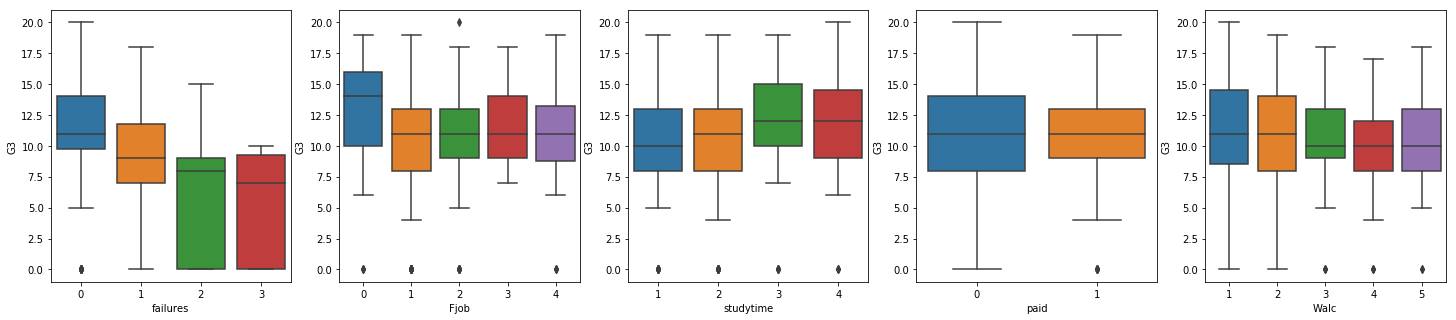

In [0]:
plt.figure(figsize=(25,5))
plt.subplot(151)
sb.boxplot(x="failures", y="G3", data=df)
plt.subplot(152)
sb.boxplot(x="Fjob", y="G3", data=df)
plt.subplot(153)
sb.boxplot(x="studytime", y="G3", data=df)
plt.subplot(154)
sb.boxplot(x="paid", y="G3", data=df)
plt.subplot(155)
sb.boxplot(x="Walc", y="G3", data=df)

## Detect and Deal with Outliers
There are many ways to detect outliers. One of the simplest methods for detecting outliers is the use of box plots.

In [0]:
#remove outliers
df["G3"].replace(0, np.nan, inplace=True)
df.dropna(subset=["G3"], axis=0, inplace=True)

##Correlation
**Correlation:** a measure of the extent of interdependence between variables.

In [0]:

df.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.004094,0.387652,0.269803,0.083722,0.044265,-0.114691,-0.063767,-0.073152,0.079341,-0.140679,0.111791,0.252305,-0.091727,0.072426,0.147362,-0.156482,-0.023536,-0.124789,0.101217,0.060598,-0.122004,0.090378,-0.050304,0.057207,0.046951,0.134172,0.068022,-0.056228,-0.098140,-0.022284,-0.080387,-0.083615
sex,-0.004094,1.000000,-0.020979,0.019267,0.078903,0.014196,0.057323,0.015794,0.185603,-0.098834,-0.074928,0.013301,0.055673,-0.291705,0.027295,0.162982,-0.155559,-0.116100,0.137657,0.039222,0.122884,0.059938,-0.072016,0.067873,0.225320,0.057319,0.260726,0.256414,0.138355,-0.085324,0.098311,0.107615,0.102448
age,0.387652,-0.020979,1.000000,0.149193,0.042800,0.018172,-0.139999,-0.138532,-0.079786,0.041252,-0.046392,0.287439,0.106723,0.000447,0.271748,0.247102,-0.120571,-0.037152,-0.132634,0.102299,0.203087,-0.107824,0.188701,0.066234,0.002889,0.128041,0.142015,0.120844,-0.049694,0.215578,-0.030706,-0.158273,-0.140372
address,0.269803,0.019267,0.149193,1.000000,-0.064781,0.033053,-0.136823,-0.078920,-0.096373,-0.016707,-0.010616,-0.040469,0.310218,0.022217,0.088995,0.018056,-0.011815,-0.037956,0.076905,0.093191,0.032868,-0.208167,-0.006875,-0.042185,-0.035075,-0.060037,0.105731,0.105986,0.015373,0.038396,-0.079552,-0.120716,-0.130090
famsize,0.083722,0.078903,0.042800,-0.064781,1.000000,-0.162896,-0.039851,-0.053340,0.060413,0.081321,-0.003248,-0.046797,0.096768,-0.069889,-0.000664,0.034989,-0.070798,-0.022652,-0.023841,-0.126832,-0.006176,0.006361,0.032038,-0.015239,0.009833,0.019701,0.092848,0.092827,-0.025078,0.019541,0.051445,0.045983,0.039744
Pstatus,0.044265,0.014196,0.018172,0.033053,-0.162896,1.000000,-0.123086,-0.088721,-0.069041,0.036487,-0.018546,0.055669,0.023900,0.017713,-0.005399,0.039790,0.035485,0.052091,0.101721,0.106999,0.024491,0.089189,-0.034151,0.022864,0.041009,-0.026186,-0.035815,0.006185,0.034694,-0.129216,-0.004197,-0.020048,-0.026665
Medu,-0.114691,0.057323,-0.139999,-0.136823,-0.039851,-0.123086,1.000000,0.608327,0.455945,-0.125080,0.124280,-0.165631,-0.177805,0.055764,-0.214681,0.064838,0.167342,0.155841,0.132343,-0.195804,-0.186744,0.181698,0.082346,-0.006585,0.017753,0.078049,0.006122,-0.049314,-0.043790,0.075924,0.172444,0.203288,0.190308
Fedu,-0.063767,0.015794,-0.138532,-0.078920,-0.053340,-0.088721,0.608327,1.000000,0.241956,-0.040844,0.062512,-0.026138,-0.185481,-0.028631,-0.262197,-0.027501,0.193273,0.100969,0.117362,-0.180068,-0.168567,0.131019,0.043622,-0.009537,-0.023222,0.042474,-0.018816,-0.018914,0.009127,0.008948,0.162752,0.178706,0.158811
Mjob,-0.073152,0.185603,-0.079786,-0.096373,0.060413,-0.069041,0.455945,0.241956,1.000000,-0.069280,0.054090,-0.098696,-0.074602,-0.024784,-0.058423,0.065050,0.052294,0.097120,0.113784,-0.109156,-0.127469,0.202084,-0.034544,0.042012,0.127070,0.019316,0.073433,-0.012709,0.091354,0.037977,0.074844,0.088584,0.083822
Fjob,0.079341,-0.098834,0.041252,-0.016707,0.081321,0.036487,-0.125080,-0.040844,-0.069280,1.000000,-0.000557,0.105367,-0.090057,0.100176,0.062678,-0.013262,0.001533,0.037958,0.043290,-0.063730,0.027556,0.035746,0.037532,0.007946,-0.017855,-0.028493,0.038594,-0.044682,0.012700,-0.012012,-0.005190,-0.019909,-0.031819


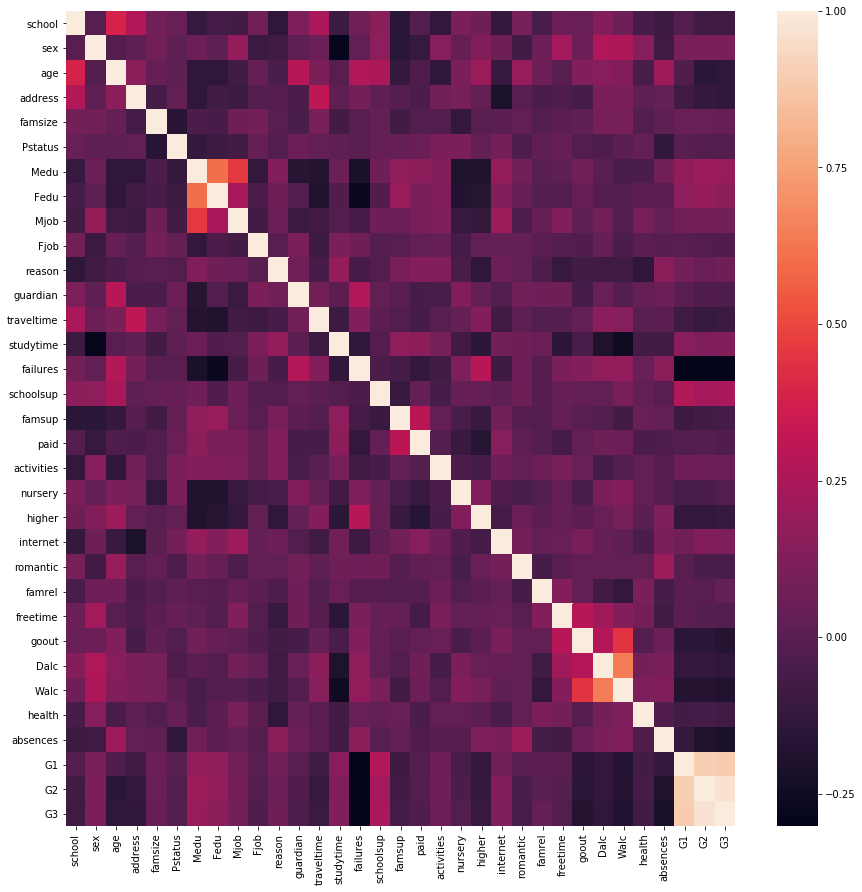

In [0]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr())

##Descriptive Statistical Analysis

Describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

* the count of that variable
* the mean
* the standard deviation (std)
* the minimum value
* the IQR (Interquartile Range: 25%, 50% and 75%)
* the maximum value

In [0]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.117647,0.481793,16.655462,0.218487,0.299720,0.890756,2.795518,2.546218,2.196078,1.450980,1.473389,0.380952,1.431373,2.042017,0.271709,0.859944,0.613445,0.484594,0.504202,0.198880,0.039216,0.837535,0.313725,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.268908,11.358543,11.523810
std,0.322642,0.500370,1.268262,0.413800,0.458778,0.312383,1.093999,1.084217,1.218161,0.884308,1.230462,0.623037,0.686075,0.831895,0.671750,0.347532,0.487644,0.500464,0.500684,0.399717,0.194380,0.369395,0.464657,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.240450,3.147188,3.227797
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [0]:
print('max final grade : ', df['G3'].max())
print('min final grade : ', df['G3'].min())
print('mean final grade :',df['G3'].mean())

max final grade :  20.0
min final grade :  4.0
mean final grade : 11.523809523809524




## Conclusion (What are Important Variables)
<h3>Select Features</h3>

In [0]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [0]:
# drop features that you don't need
df = df.drop(['school','address', 'reason', 'Pstatus', 'guardian', 'nursery'], axis =1)
df.head()

,sex,age,famsize,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,4,4,0,0,2,2,0,0,0,0,0,0,0,0,4,3,4,1,1,3,6,5,6,6.0
1,0,17,0,1,1,0,1,1,2,0,1,1,0,0,0,1,0,5,3,3,1,1,3,4,5,5,6.0
2,0,15,1,1,1,0,1,1,2,3,0,0,1,0,0,1,0,4,3,2,2,3,3,10,7,8,10.0
3,0,15,0,4,2,1,2,1,3,0,1,1,1,1,0,1,1,3,2,2,1,1,5,2,15,14,15.0
4,0,16,0,3,3,2,1,1,2,0,1,1,1,0,0,0,0,4,3,2,1,2,5,4,6,10,10.0


In [0]:
labels = df['G3'].values
features = df.drop(['G3'],axis=1).values



##Start Model Development



1. **Spilt data**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(249, 26) (108, 26) (249,) (108,)



   2. **Bulid, Train and Evaluate the Model**


In [0]:
# Build The structure of Model
from sklearn import linear_model

model=linear_model.LinearRegression()

# Train the Model
model.fit(X_train, y_train)

# Evaluate
Accuracy = model.score(X_train, y_train)
print ("Accuracy of the training : ", Accuracy*100)

accuracy = model.score(X_test, y_test)
print ("Accuracy of the testing : ", accuracy*100)


Accuracy of the training :  94.86860118914603
Accuracy of the testing :  90.01713009473956


3. **Predict**

In [0]:
# Predict 
predict = model.predict(X_test)
idx= np.random.choice(X_test.shape[0]) 
print ("Predicted final grade : ", predict[idx])
print ("Real final grade : ", y_test[idx])

Predicted final grade :  7.452425634809797
Real final grade :  8.0


4. **Visualize**

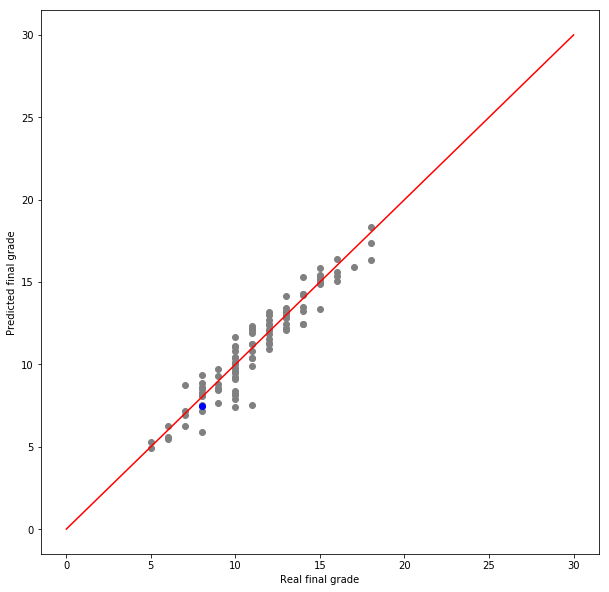

In [0]:
# visualization
plt.figure(figsize=(10,10))
plt.scatter(y_test, predict,  color='Grey')
plt.scatter(y_test[idx], predict[idx] , color='blue')
plt.xlabel('Real final grade')
plt.ylabel('Predicted final grade')
plt.plot([0, 30], [0, 30], color='red')

#Save, Load and Use the Model

In [0]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, 'saved_model.pkl') 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['saved_model.pkl']

In [0]:
# Load the pickle file
model_load = joblib.load('saved_model.pkl') 

In [0]:
#check if it the same model by print the score for test set
result = model_load.score(X_test, y_test)
print(result)

0.9001713009473956


 **Remember**  


**input_columns**=['sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

 **Remember**  
 
school {'GP': 0, 'MS': 1}  
sex {'F': 0, 'M': 1}  
address {'U': 0, 'R': 1}  
famsize {'GT3': 0, 'LE3': 1}  
Pstatus {'A': 0, 'T': 1}  
Mjob {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}  
Fjob {'teacher': 0, 'other': 1, 'services': 2, 'health': 3, 'at_home': 4}  
reason {'course': 0, 'other': 1, 'home': 2, 'reputation': 3}  
guardian {'mother': 0, 'father': 1, 'other': 2}  
schoolsup {'yes': 0, 'no': 1}  
famsup {'no': 0, 'yes': 1}  
paid {'no': 0, 'yes': 1}  
activities {'no': 0, 'yes': 1}  
nursery {'yes': 0, 'no': 1}  
higher {'yes': 0, 'no': 1}  
internet {'no': 0, 'yes': 1}  
romantic {'no': 0, 'yes': 1}  


In [0]:
#use the saved model for prediction
exmaple_input= [ 0 , 16 , 0 , 2 , 1 , 0 , 2  ,2 , 2,  1 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 4 , 2 , 5 , 1 , 2 , 5 , 2 , 20,  20]
exmaple_predict= model_load.predict(np.array( [exmaple_input,]))
print("Predicted example input : ", exmaple_predict)


Predicted example input :  [19.73365231]
